<a href="https://colab.research.google.com/github/Andrew55529/IMDP/blob/master/python/anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title          object
Production     object
Episodes       object
Source         object
Genre          object
Airdate        object
Rating        float64
Voters         object
Theme          object
dtype: object
rating:
count    1944.000000
mean        7.150849
std         0.709454
min         2.960000
25%         6.720000
50%         7.210000
75%         7.590000
max         9.160000
Name: rating, dtype: float64
count    1939.000000
mean       14.975245
std        28.116711
min         1.000000
25%         1.000000
50%        12.000000
75%        13.000000
max       500.000000
Name: episodes, dtype: float64
{'FILMONY': 1, 'Kitty Film Mitaka Studio': 1, 'Tsuchida Productions': 1, 'Creators in Pack': 1, 'Sola Digital Arts': 1, 'Asatsu DK': 1, 'Bibury Animation CG': 1, 'ENGI': 1, 'Jumonji': 1, 'Phoenix Entertainment': 1, 'Nakamura Production': 1, 'Vega Entertainment': 1, 'Knack Productions': 1, 'Filmlink International': 1, 'LandQ studios': 1, 'October Media': 1, 'Fifth Avenue': 1, 'Blade

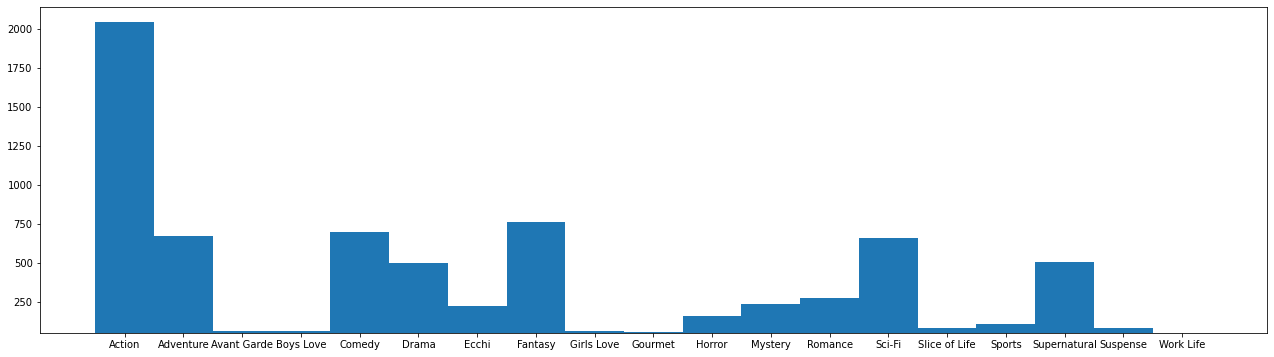

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


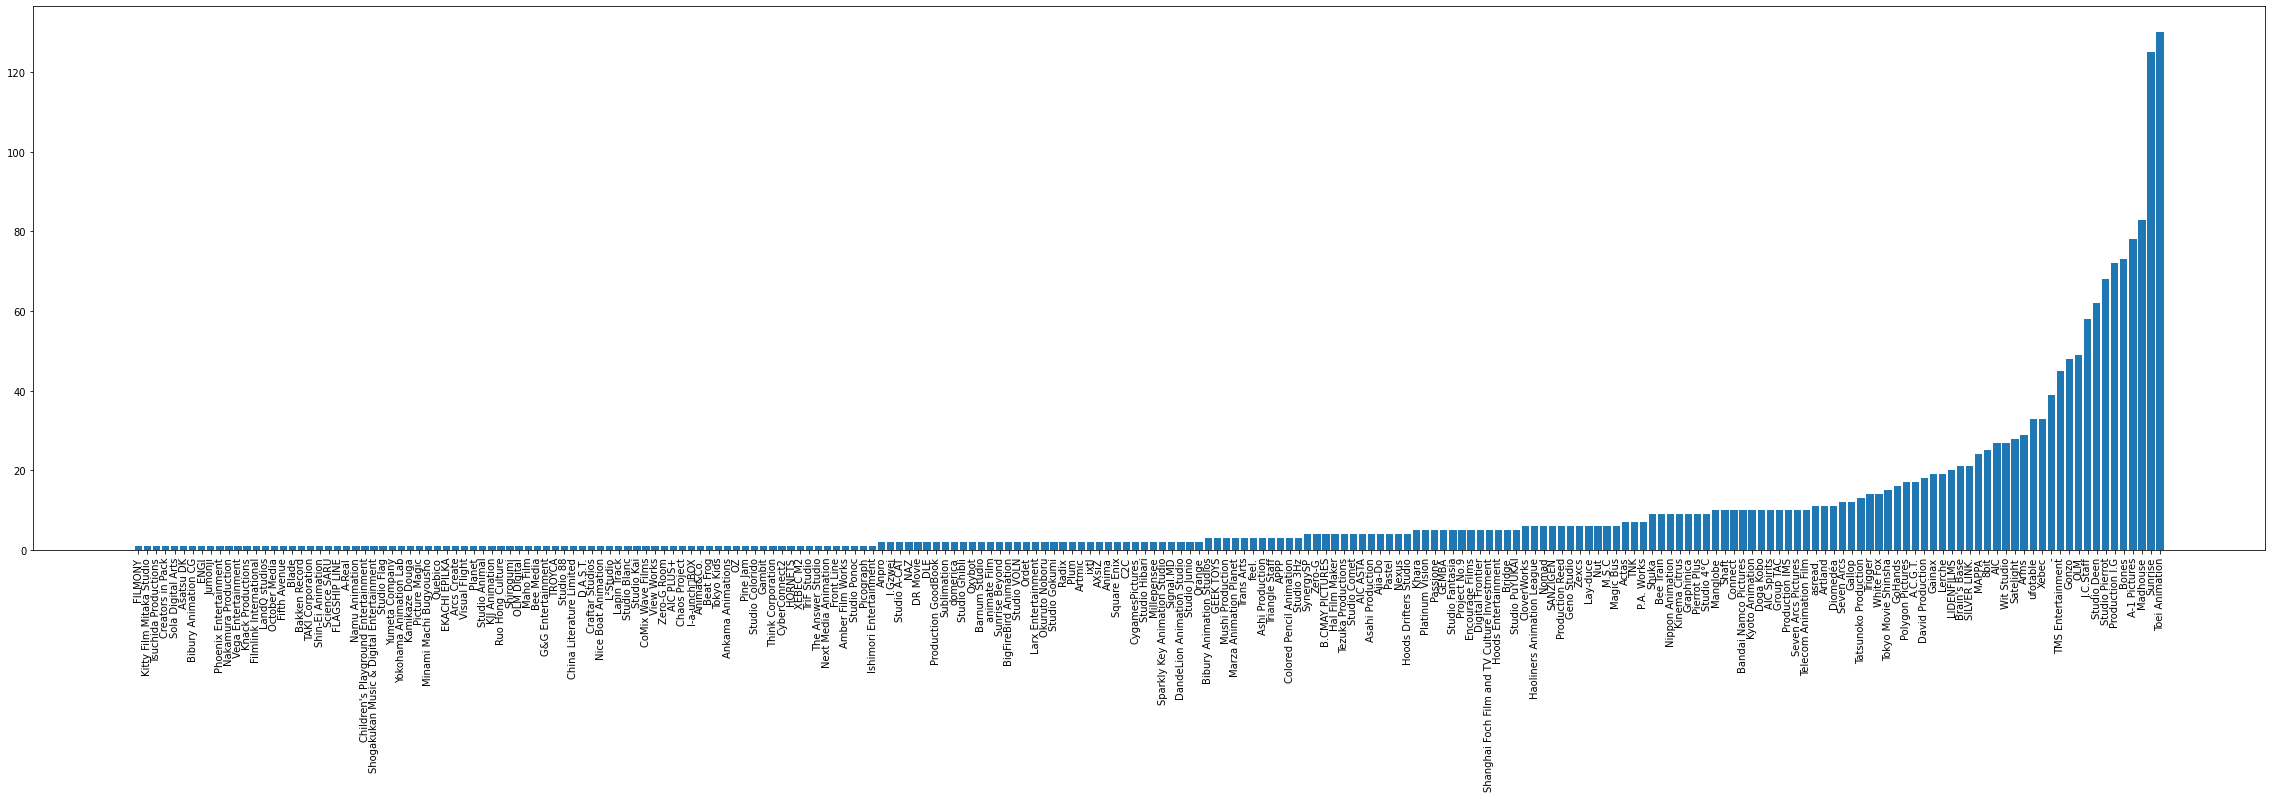

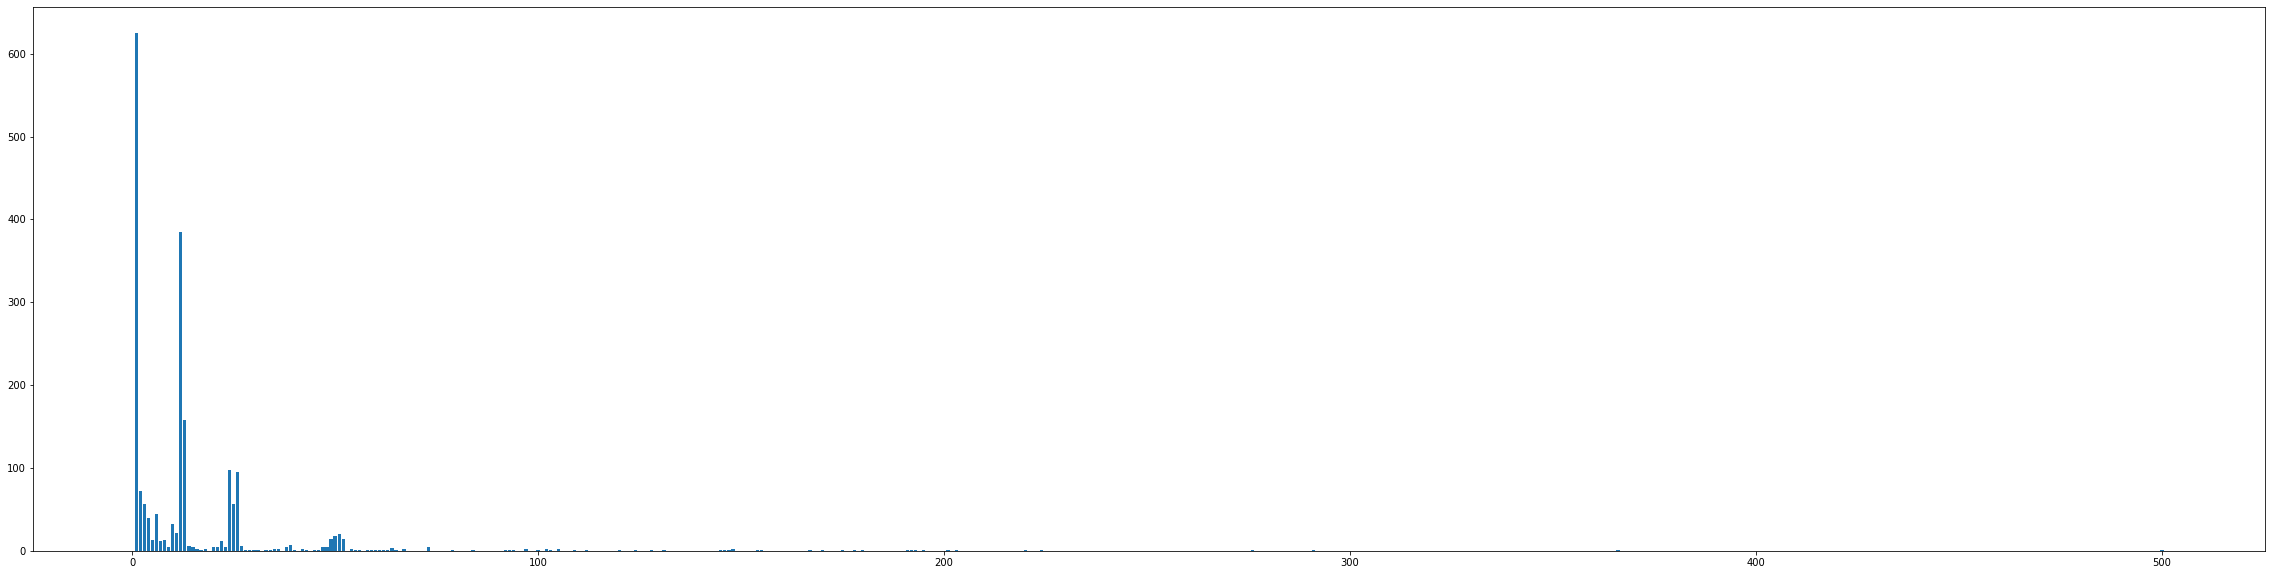

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import axes3d

data = pd.read_csv('anime.csv', delimiter=',')
data.loc[(data['Episodes'] == '?'), 'Episodes'] = np.nan   #1
data.head(10)   #2
print(data.dtypes) #3
data.columns = data.columns.str.lower()  #4
print("rating:")

print(data['rating'].describe())  

data['voters'] = data['voters'].str.replace(',','')
data['voters'] = data['voters'].astype(int)
perc =[.90]
data.describe(percentiles = perc, include = ['float64','int64']) #5

data.groupby(['production', 'title']).sum()

data.fillna({'episodes':0,'source':' ',	'genre': ' ',	'airdate':' ',	'rating' :' ',	'voters': 0,	'theme': ' '})

data['episodes'] = data['episodes'].astype(float)
print(data['episodes'].describe())    #5

genresList = list(data['genre'].str.split(','))
genres = dict()
listGeneres = sum(genresList, [])
fig, ax = mpl.subplots()
fig.set_figwidth(22)
fig.set_figheight(6)
ax.bar(list(sorted(set(listGeneres))), [listGeneres.count(x) for x in sorted(set(listGeneres))], 1, 50)

fig2, bx = mpl.subplots()
fig2.set_figwidth(40)
fig2.set_figheight(10)

company = dict((x, list(data['production']).count(x)) for x in set(data['production']))
sorted_company = sorted(company.items(), key=lambda x: x[1])
print(dict(sorted_company))
bx.bar(dict(sorted_company).keys(), dict(sorted_company).values())
mpl.xticks(rotation=90)

fig3, cx = mpl.subplots()
fig3.set_figwidth(40)
fig3.set_figheight(10)


ep = dict((x, list(data['episodes'].dropna()).count(x)) for x in set(data['episodes'].dropna()))
ep_sorted = sorted(ep.items(), key=lambda x: x[0])
print(ep_sorted)
cx.bar(dict(ep_sorted).keys(), dict(ep_sorted).values())
mpl.show()

In [2]:
print("Топ 3 источника")
teasss = data.groupby(['source']).size()
teasss.sort_values().iloc[-3:]


Топ 3 источника


source
Light novel    263
Original       468
Manga          818
dtype: int64

In [3]:
src1 = data.groupby(['source']).size().sort_values()
src1.head()

source
Book             1
Picture book     1
Card game        9
Web manga       32
-               39
dtype: int64

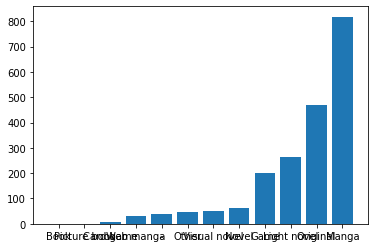

In [4]:
segse=src1.to_list()
ax = mpl.bar(src1.index, segse)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


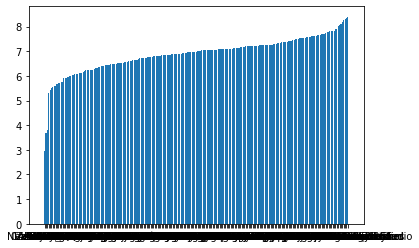

In [5]:
ratings = data.groupby(['production'])['rating'].mean().sort_values().dropna()
ax = mpl.bar(ratings.index, ratings)

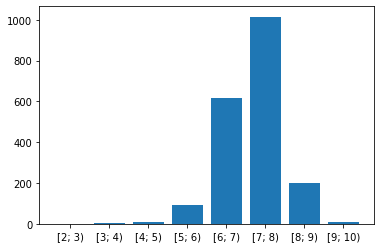

In [6]:
ratings = data.rating.dropna().apply(int).value_counts().sort_index().rename(lambda t: f'[{t}; {t+1})')
ax = mpl.bar(ratings.index, ratings)